In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/traffic_accident.csv")
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [30]:
print("Missing values in each column:")
print(df.isnull().sum())

df = df.dropna()

Missing values in each column:
Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64


In [31]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [32]:
X = df.drop(columns=["Accident"])
y = df["Accident"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
y_pred_gini = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

In [36]:
dt_gini_depth3 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_gini_depth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

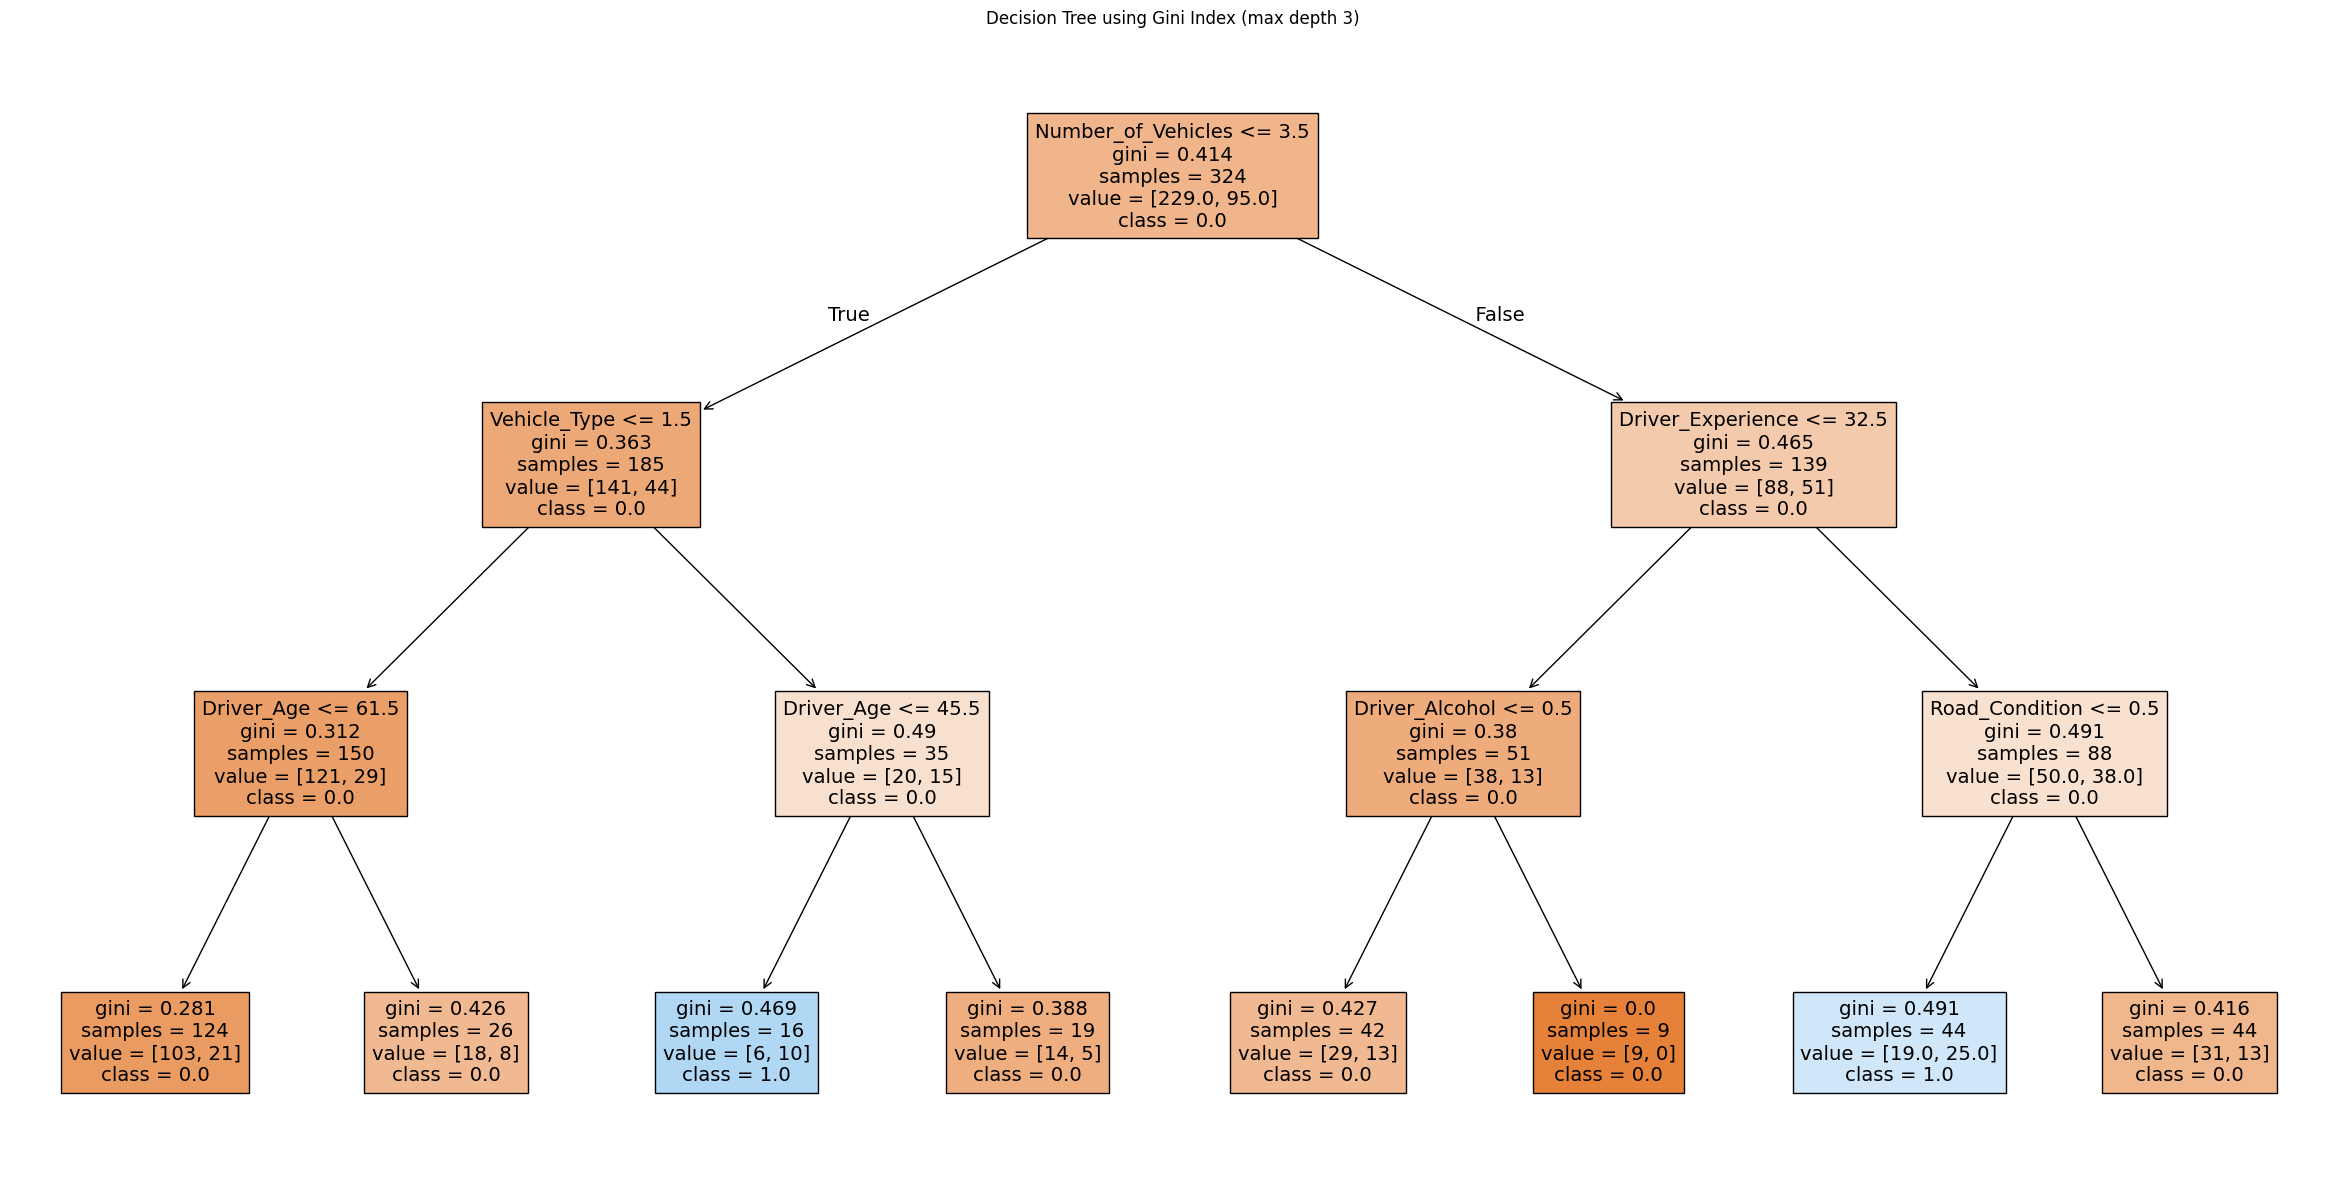

In [37]:
plt.figure(figsize=(30,15))
plot_tree(dt_gini_depth3, feature_names=X.columns, class_names=[str(cls) for cls in set(y)], filled=True)
plt.title("Decision Tree using Gini Index (max depth 3)")
plt.show()

In [38]:
print(f"Accuracy using Gini Index: {accuracy_gini:.4f}")

Accuracy using Gini Index: 0.6173


In [39]:
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
y_pred_entropy = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

In [41]:
print(f"Accuracy using Entropy: {accuracy_entropy:.4f}")

Accuracy using Entropy: 0.6543
